# Regresión Logistíca con SCIKIT-LEARN

## Regresíon Logística Ejercicio 1

Conociendo el dataset, el profesor "Freddy Michael Kruege Myres", no tiene claro que tiempo recomendarles a sus estudiantes para que estudien para el examen y con ello garantizar las mejores notas. Por lo tanto recolecta la base de datos con los útimos 2000 exámenes donde están las horas que estudiaron y si aprobó o no. 

En la variante de este ejercicio se presenta el caso de horas de tutoria para cada celda.
  
La base de datos esta disponible en:

[Horas de Estudio diario y Tutorías por mes vs Aprobación](https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset's/horas_estudio_tutorias_vs_aprobacion.csv)



### Importar Librerías y DATA

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.DataFrame()
data = pd.read_csv(
    "https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset's/horas_estudio_tutorias_vs_aprobacion.csv", 
    encoding='utf-8')

### Conocer la DATA

In [ ]:
data.info

<bound method DataFrame.info of      horas_autoestudio_diario  tutorias_mes  aprobo_perdio
0                           7            27              1
1                           2            43              0
2                           7            26              1
3                           8            29              1
4                           3            42              0
..                        ...           ...            ...
995                         6            22              1
996                         9            30              1
997                         3            39              0
998                         7            25              1
999                         5            37              0

[1000 rows x 3 columns]>

In [ ]:
data.describe()

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   horas_autoestudio_diario  1000 non-null   int64
 1   tutorias_mes              1000 non-null   int64
 2   aprobo_perdio             1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
data.isnull().sum()

horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64

### Graficar la DATA

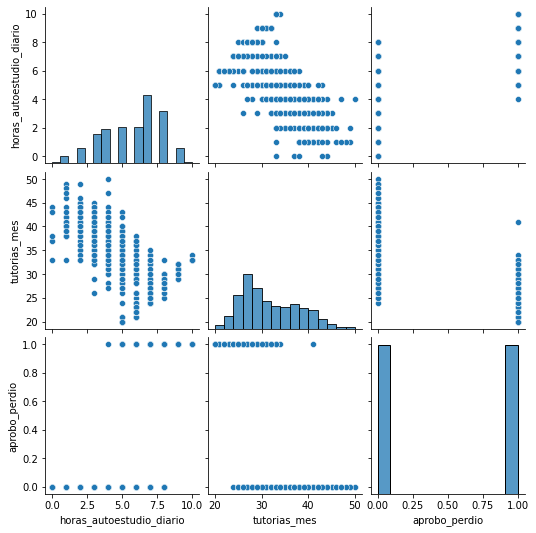

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

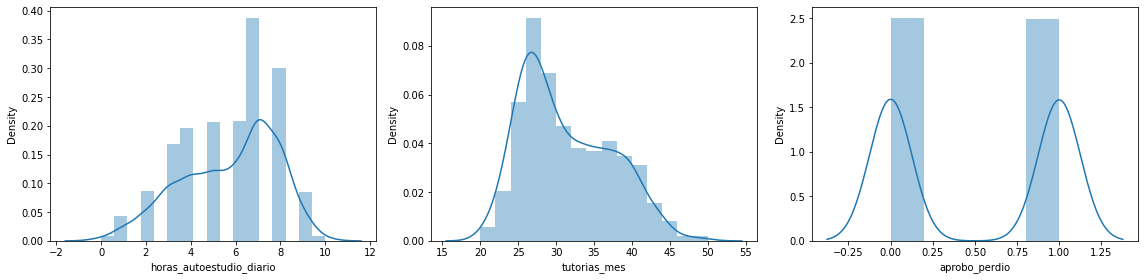

In [ ]:
cols = 3
fig, ax = plt.subplots(ncols=cols, figsize=(16,4))

col = data.columns
index = 0

for i in range(cols):
  sns.distplot(data[col[index]], ax=ax[i])
  index += 1

plt.tight_layout()

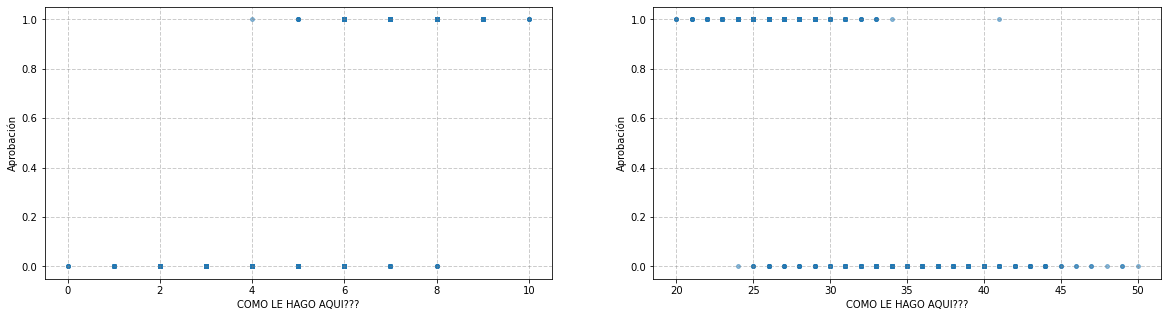

In [ ]:
col = data.columns
index = 0
plt.figure(figsize=(20,5))

for i in range(1,3):
  plt.subplot(1, 2, i)
  X = data[col[index]]
  y = data['aprobo_perdio']
  plt.scatter(X, y, s=15, alpha=0.5)
  plt.xlabel('COMO LE HAGO AQUI???')
  plt.ylabel('Aprobación')
  plt.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  i += 1
  index += 1

### Preparación de la DATA

In [ ]:
X = data.drop('aprobo_perdio', axis=1)
y = data.aprobo_perdio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)

### Entrenamiento de la DATA

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predecir

In [ ]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1]


### Probabilidades

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 97.0%


### Pruebas con datos manuales

La nueva predicción se hace con los siguientes datos:  

||Horas Estudio|Horas Tutorías|
|----|----|----|
|1-estudiante|4|38|
|2-estudiante|8|29|
|3-estudiante|1|1|
|4-estudiante|0|0|

In [ ]:
students = np.array([[4,38],[8,29],[1,1],[0,0]])
x_new = pd.DataFrame(students, columns=['horas_autoestudio_diario', 'tutorias_mes'])
y_prediction = logistic_regression.predict(x_new)
print(y_prediction)

[0 1 1 1]


## Regresión Logística Ejercicio 2

### Descripción del problema

El conjunto de datos fue tomado del repositorio UCI Machine Learning, con algunos cambios realizados en el repositorio de [Machine Learning, Luis Castellanos](https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset's/mercadeo_bancario.csv), y esta relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente se subscribirá(1/0) a un depósito a plazo (variable y)

Las variables del dataset son las siguientes: 

- edad (numérica)
- trabajo: tipo de trabajo (categórico: "admin.”, "housemaid", "management", "retired", "self-employed", "student", "technician", "unemployed", "unknown")
- conyugal: estado civil (categórico: "divorciado", "casado", "único", "desconocido")
- educación (categórica: “preschool", “primary_school", “tecnical_school", " Technological_school", "illiterate", "professional.course", "university.degree", "unknown")
- Total_hijos: número total de hijos
- credito_sin_pago: ¿tiene crédito en incumplimiento de pago? (categóricamente: "no", "sí", "desconocido")
- prestamo_vivienda: ¿tiene préstamo de vivienda? (categóricamente: "no", "sí", "desconocido")
- prestamo_personal: ¿tiene préstamo personal? (categóricamente: "no", "sí", "desconocido")
- valor_préstamo:(numérico) es el valor total del prestamos que tiene con el banco
- tarjetas_credito: Número de tarjetas de crédito con otros bancos
- contacto: tipo de comunicación de contacto (categórico: "celular", "teléfono")
- mes: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
- dia_semana: último día de contacto de la semana (categórico: "mon", "tue", "wed", "thu", "fri")
- duracion_ultimo_contacto: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al destino de salida (p. ej., si
duration-0 y 'no').
- campanna: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
- dias_ultimo_contacto: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
- anterior_contacto: número de contactos realizados antes de esta campaña y para este cliente (numérico)
- resultado_anterior: resultado de la campaña de marketing anterior (categórica: "fracaso", "inexistente", "éxito")
- numero_empleados: número de empleados que tiene a su cargo — (numérico)
- Predecir variable (objetivo deseado): (binario: "1", significa "Sí", "0" significa "No")

### Importar librerías y data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/mercadeo_bancario.csv", encoding='utf-8')

### Conocer la data

In [3]:
data.describe()

,edad,total_hijos,valor_prestamo,dias_ultimo_pago,tarjetas_credito,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.984680,149706.676751,0.336409,2.497524,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,2.583405,166028.840792,4.478984,1.703683,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,4.000000,81778.500000,0.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,6.000000,290938.500000,0.000000,4.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,8.000000,499992.000000,90.000000,5.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


In [4]:
data.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

In [5]:
data.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

In [7]:
uniqueValues = data['credito_sin_pago'].unique()
print(sorted(uniqueValues))

['no', 'unknown', 'yes']


### Convertir Data Categorica en Data Numerica

In [8]:
trabajo = {
    'unknown': 0,
    'admin.': 1, 
    'housemaid': 2, 
    'management': 3, 
    'retired': 4, 
    'self-employed': 5, 
    'student': 6, 
    'technician': 7, 
    'unemployed': 8,
    'blue-collar': 9,
    'services': 10,
    'entrepreneur': 11
    }
data['trabajo'] = data['trabajo'].map(trabajo)

In [9]:
estado_civil = {
    'unknown': 0,
    'single': 1,
    'married': 2,
    'divorced' : 3
    }
data['estado_civil '] = data['estado_civil '].map(estado_civil)

In [10]:
educacion = {
    'unknown': 0,
    'preschool': 1,
    'primary_school': 2,
    'tecnical_school': 3,
    'Technological_school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
data['educacion'] = data['educacion'].map(educacion)

In [11]:
credito_sin_pago = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['credito_sin_pago'] = data['credito_sin_pago'].map(credito_sin_pago)

In [12]:
prestamo_vivienda = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_vivienda'] = data['prestamo_vivienda'].map(prestamo_vivienda)

In [13]:
prestamo_personal = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_personal'] = data['prestamo_personal'].map(prestamo_personal)

In [14]:
contacto = {
    'cellular': 1,
    'telephone': 2,
}
data['contacto'] = data['contacto'].map(contacto)

In [15]:
mes = {
    'jan':1,
    'feb':2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec':12
}
data['mes'] = data['mes'].map(mes)

In [16]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)

###Convertir Data Categorica en Data Numerica V2 (usando preprocessing)

In [17]:
from sklearn import preprocessing
le =preprocessing.LabelEncoder()  #instanciamos el Codificador 

In [18]:
le.fit(data['mes'])  #codificamos las categorias
list(le.classes_)

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [19]:
le.transform(data['mes'])   #transformamos las categorias a valores numericos


array([5, 8, 3, ..., 2, 7, 2])

In [21]:
data['trabajo']=le.fit_transform(data['trabajo'])  # (version rapida)
data['estado_civil ']=le.fit_transform(data['estado_civil '])  # (version rapida)
#data['educacion']=le.fit_transform(data['educacion'])  # (version rapida)
data['credito_sin_pago']=le.fit_transform(data['credito_sin_pago'])  # (version rapida)
data['prestamo_vivienda']=le.fit_transform(data['prestamo_vivienda'])  # (version rapida)
data['prestamo_personal']=le.fit_transform(data['prestamo_personal'])  # (version rapida)
data['contacto']=le.fit_transform(data['contacto'])  # (version rapida)
#data['mes']=le.fit_transform(data['mes'])  # (version rapida)
#data['dia_semana']=le.fit_transform(data['dia_semana'])  # (version rapida)

In [20]:
uniqueValues = data['estado_civil '].unique()
print(uniqueValues)

[2 1 3 0]


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

In [22]:
data = data.fillna(0)

In [23]:
data['mes'] = data['mes'].astype('int')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

### Graficar la Data

In [25]:
data.describe()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,5.702001,1.827231,4.410969,3.984680,0.421336,0.571914,0.199767,149706.676751,0.336409,2.497524,1.365252,6.607896,3.979581,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,3.533820,0.608902,2.225748,2.583405,0.811128,0.541209,0.456002,166028.840792,4.478984,1.703683,0.481507,2.040998,1.411514,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,7.000000,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,81778.500000,0.000000,2.000000,1.000000,6.000000,4.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,9.000000,2.000000,7.000000,6.000000,0.000000,1.000000,0.000000,290938.500000,0.000000,4.000000,2.000000,8.000000,5.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,11.000000,3.000000,7.000000,8.000000,2.000000,2.000000,2.000000,499992.000000,90.000000,5.000000,2.000000,12.000000,6.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

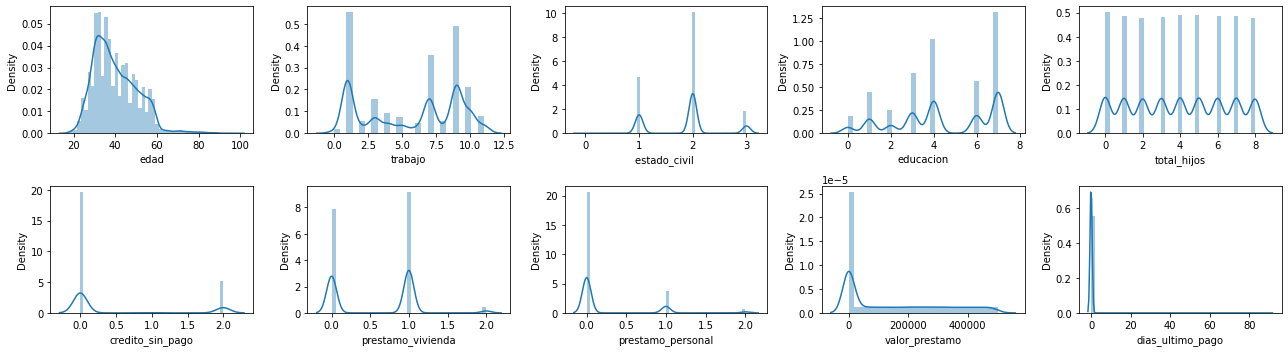

In [26]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,5))

col = data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]], ax=ax[i][j])
    index += 1

plt.tight_layout()

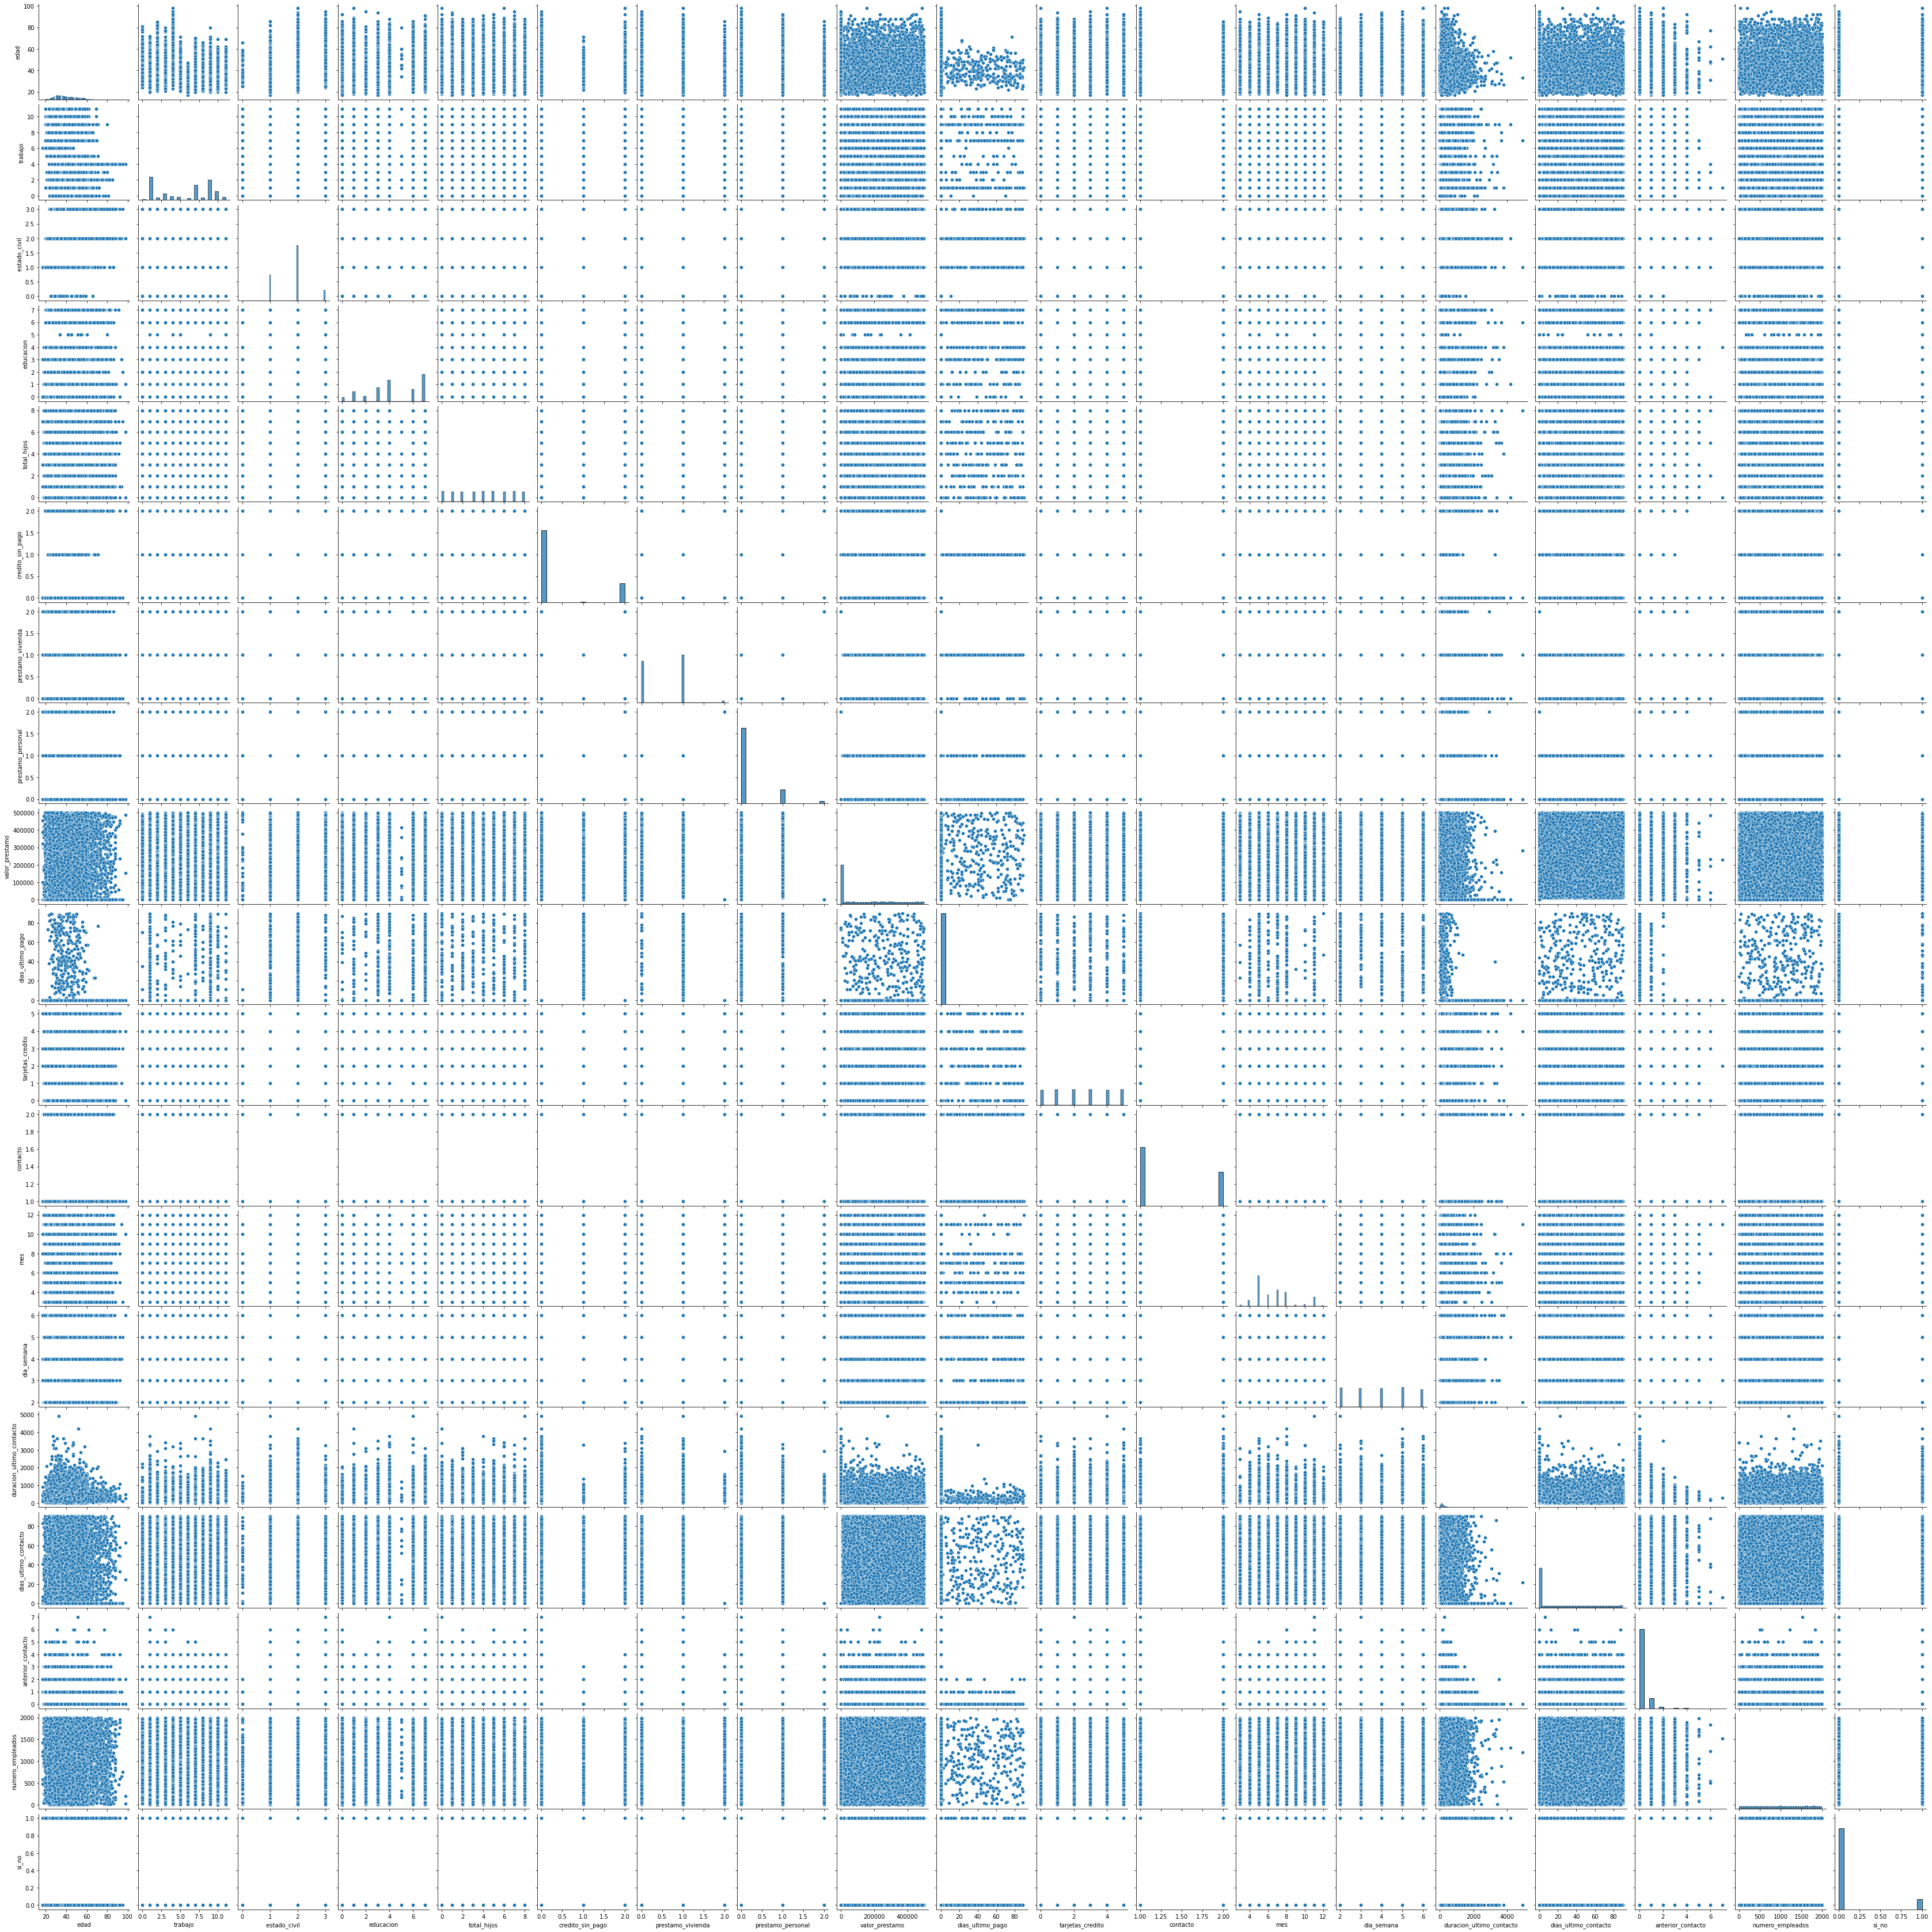

In [27]:
sns.pairplot(data)

### Responder algunas preguntas

Edad Promedio de los que dijeron SI

In [28]:
data[data['si_no']==1]['edad'].mean()

40.91314655172414

Edad Promedio de los que dijeron NO

In [29]:
data[data['si_no']==0]['edad'].mean()

39.911185290576775

Promedio de Hijos

In [30]:
data['total_hijos'].mean()

3.9846800038846264

Cantidad de personas según su estado Civil

In [31]:
data['estado_civil '].value_counts()

2    24928
1    11568
3     4612
0       80
Name: estado_civil , dtype: int64

Cantida de personas según su trabajo

In [32]:
data['educacion'].value_counts()

7    12168
4     9515
3     6045
6     5243
1     4176
2     2292
0     1731
5       18
Name: educacion, dtype: int64

### Construir el modelo de Regresión Logística

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [77]:
X = data.drop('si_no', axis=1)
y = data.si_no

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=36, test_size=0.49)

In [78]:
x_train.shape

(21005, 18)

In [79]:
logistic_regression = LogisticRegression()

In [80]:
logistic_regression.fit(X, y)

LogisticRegression()

In [81]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[0 0 0 ... 0 0 1]


In [82]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 89.54565723628797%


In [83]:
logistic_regression.score(x_test, y_test)

0.8954565723628797

### Predicciones Manuales

Predecir la respuesta de las siguientes personas con las caracteristicas:

||Edad|Trabajo|Estado Civil|Educacion|Total hijos|Credito_sin_pago|Prestamo vivienda|Prestamo personal|Valor prestamo|Dias ultimo pago|Tarjetas credito|Contacto|Mes|Día semana|Duración último contacto|Días último contacto|Anterior contacto|numero_empleados|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|persona-1|20|unemployed|single|tecnical school|0|yes|no|yes|2000|3|0|1|april|monday|280 sg|15|2|0|

In [56]:
personas = np.array([[41,8,1,3,0,0,0,1,100,3,0,1,4,2,280,15,2,100]])
x_new = pd.DataFrame(personas, columns=['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'])
y_prediction = logistic_regression.predict(x_new)
print(y_prediction)

[0]


### Recursive Feature Elimination (RFE) - Eliminación de características recursivas (RFE)

---
https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451


In [62]:
from sklearn.feature_selection import RFE

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=100000)
rfe = RFE(model, 3, verbose=1)
rfe = rfe.fit(X, y)

In [ ]:
rfe.support_

In [51]:
X.head(1)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados
0,44,9,2,1,7,2,1,0,268017,0,5,1,8,5,210,43,0,88


In [ ]:
XX = X[X.columns[rfe.support_]]
XX.head(1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=8, stratify=y)

NameError: ignored

In [60]:
X_train.shape

NameError: ignored

In [59]:
model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

NameError: ignored

In [61]:
model.score(X_test, y_test)

NameError: ignored